In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# NLTK VADER for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\garvi\AppData\Roaming\nltk_data...


True

In [18]:
excel_file = 'Nifty Headlines - Post COVID.csv'
news = pd.read_csv(excel_file)

In [19]:
news.head()

,Headlines,Links,Dates
0,Share market update: Nifty Financial Services ...,https://m.economictimes.com/markets/stocks/new...,01-Feb-20
1,"Sensex plunges 700 points, Nifty below 11,800;...",https://m.economictimes.com/markets/stocks/new...,01-Feb-20
2,"Sensex drops 200 points, Nifty below 11,900; T...",https://m.economictimes.com/markets/stocks/new...,01-Feb-20
3,"Tech View: As Nifty flirts with 200-day EMA, a...",https://m.economictimes.com/markets/stocks/new...,01-Feb-20
4,"Sensex drops 275 points, Nifty near 11,950; Te...",https://m.economictimes.com/markets/stocks/new...,01-Feb-20


In [20]:
vader = SentimentIntensityAnalyzer()
scores = news['Headlines'].apply(vader.polarity_scores).tolist()

In [21]:

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
newsScore = news.join(scores_df, rsuffix='_right')

newsScore.head()

,Headlines,Links,Dates,neg,neu,pos,compound
0,Share market update: Nifty Financial Services ...,https://m.economictimes.com/markets/stocks/new...,01-Feb-20,0.000,0.671,0.329,0.5994
1,"Sensex plunges 700 points, Nifty below 11,800;...",https://m.economictimes.com/markets/stocks/new...,01-Feb-20,0.000,0.787,0.213,0.4019
2,"Sensex drops 200 points, Nifty below 11,900; T...",https://m.economictimes.com/markets/stocks/new...,01-Feb-20,0.164,0.625,0.211,0.1531
3,"Tech View: As Nifty flirts with 200-day EMA, a...",https://m.economictimes.com/markets/stocks/new...,01-Feb-20,0.000,0.714,0.286,0.5267
4,"Sensex drops 275 points, Nifty near 11,950; Te...",https://m.economictimes.com/markets/stocks/new...,01-Feb-20,0.000,0.828,0.172,0.4019


In [22]:
newsScore.to_csv("PostCovid-newsScore.csv")

In [25]:
# Convert the date column from string to datetime
newsScore['date'] = pd.to_datetime(newsScore.Dates).dt.date

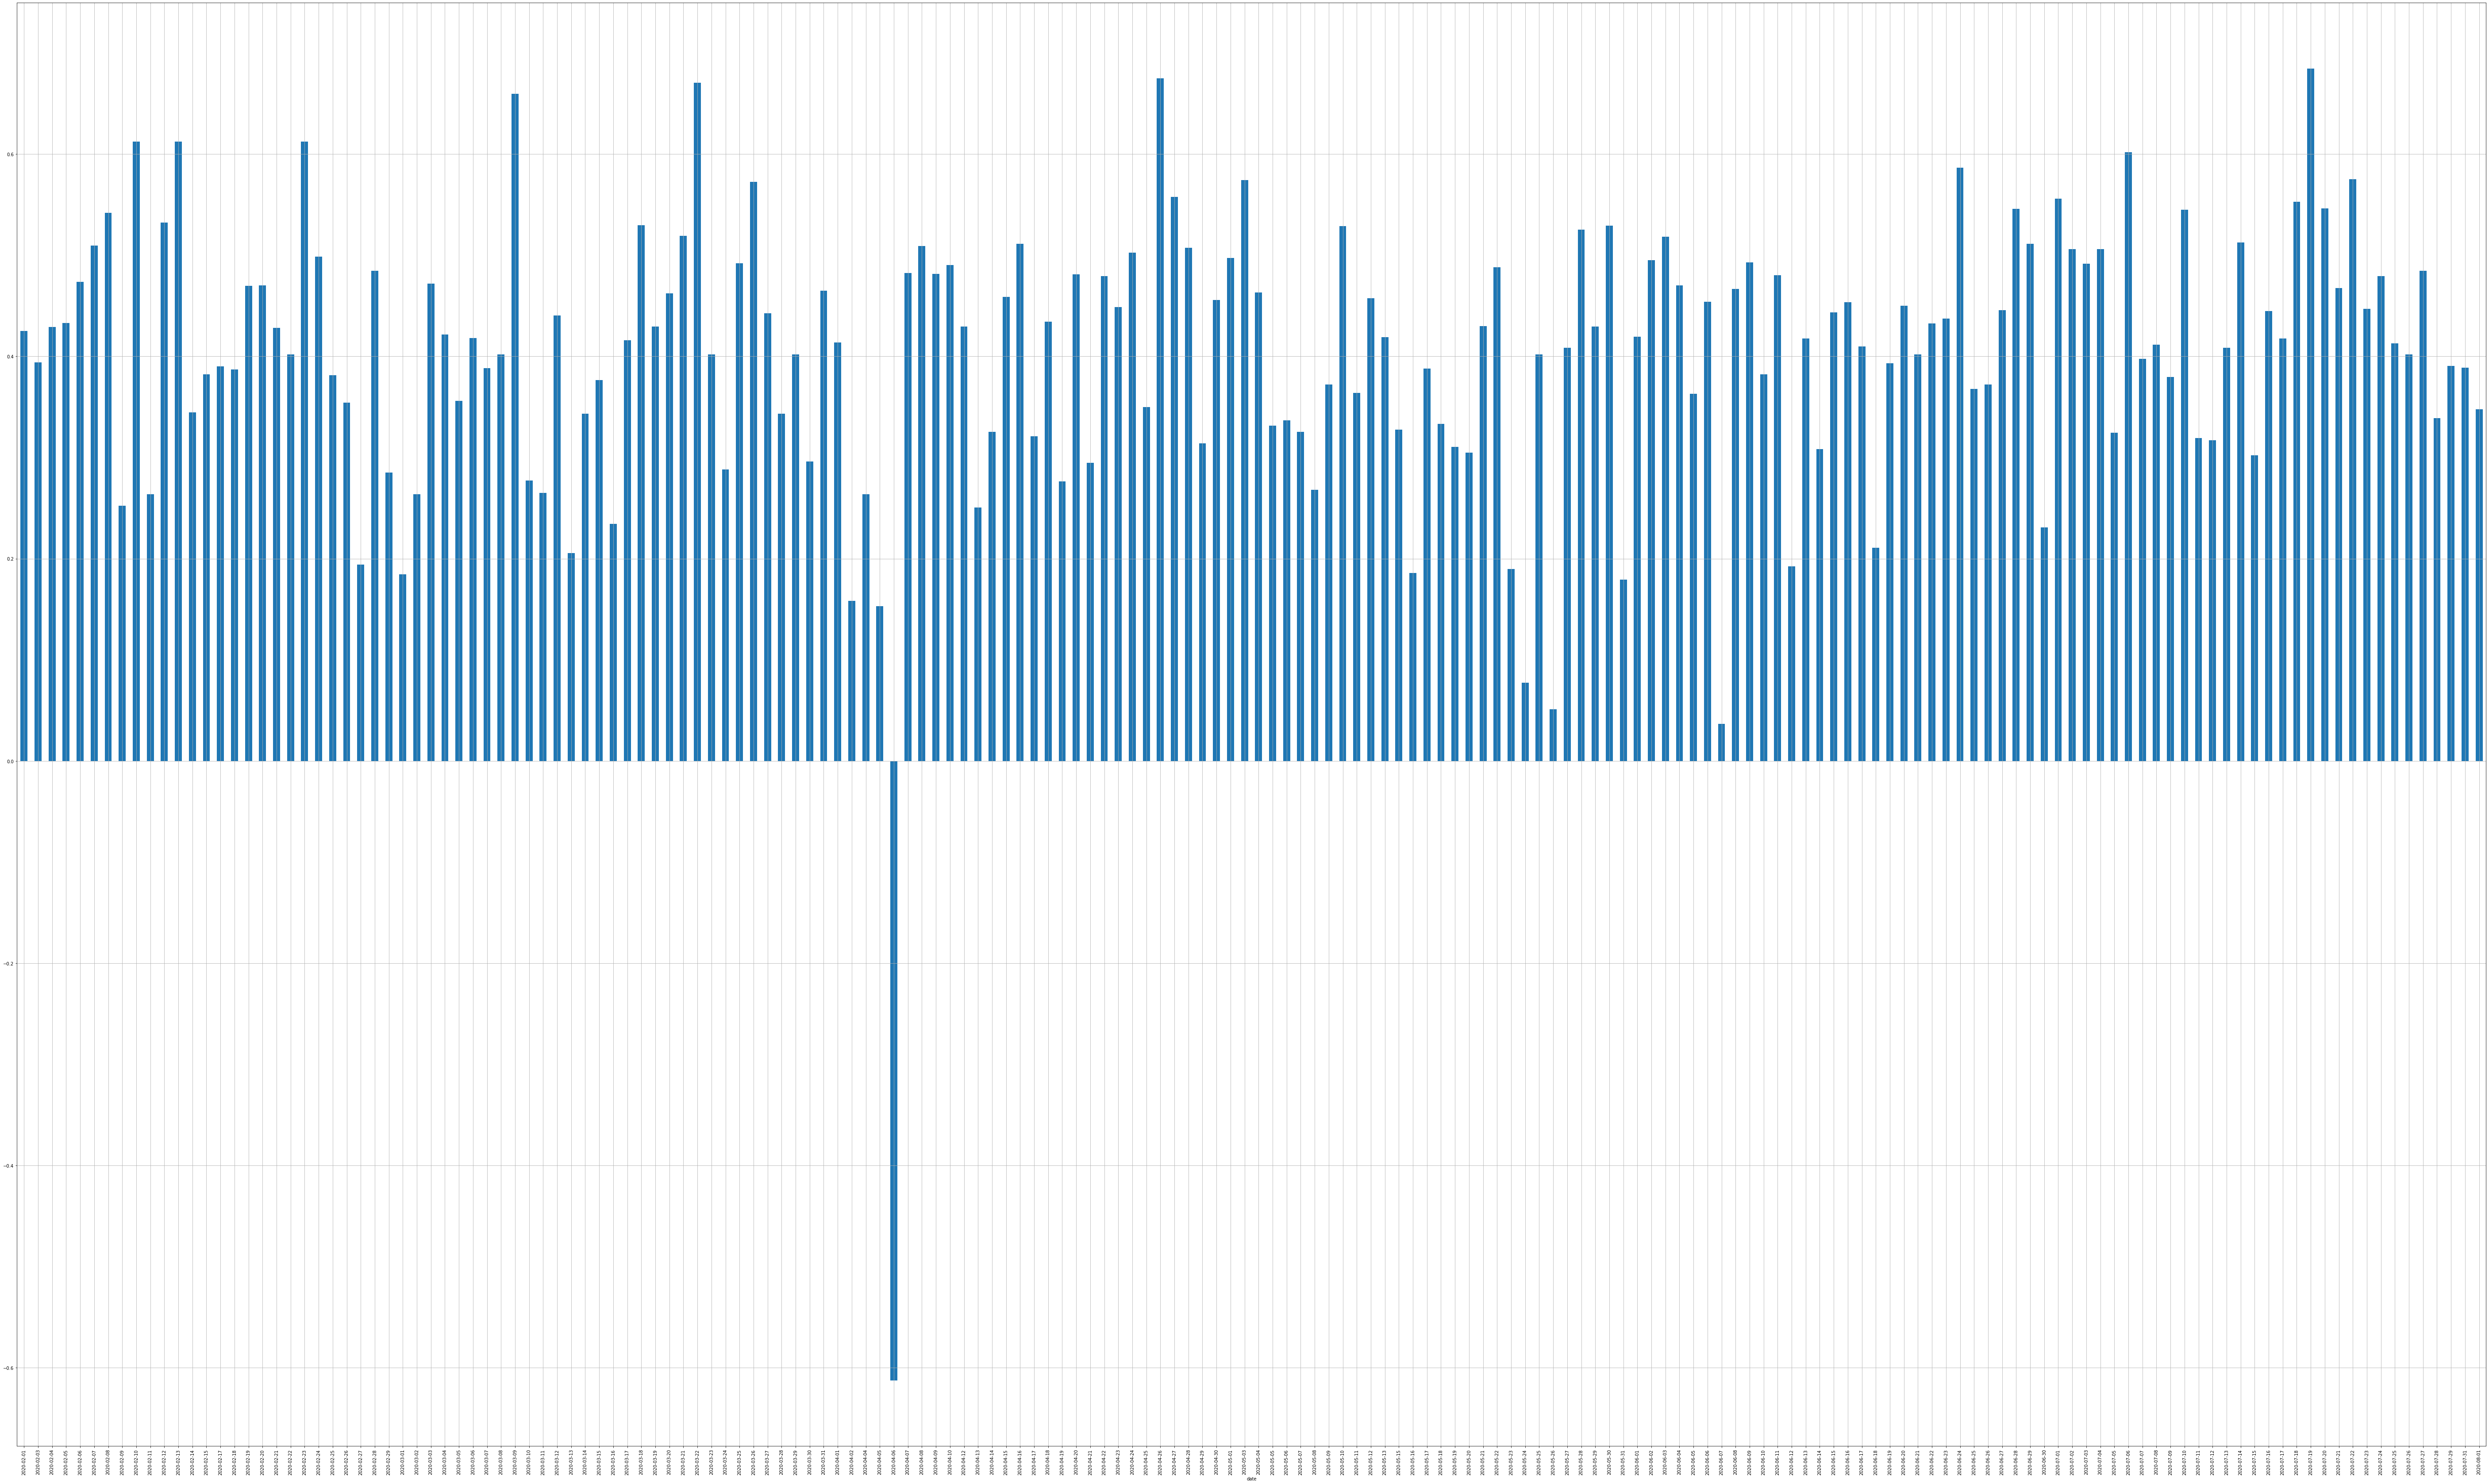

In [27]:
plt.rcParams['figure.figsize'] = [100, 60]

# Group by date and from scored_news and calculate the mean
mean_scores = newsScore.groupby(['date']).mean()

# Get the cross-section of compound in the 'columns' axis
mean_scores = mean_scores.xs('compound', axis="columns").transpose()

# Plot a bar chart with pandas
mean_scores.plot(kind = 'bar')
plt.grid()